In [3]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()
timeseries.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


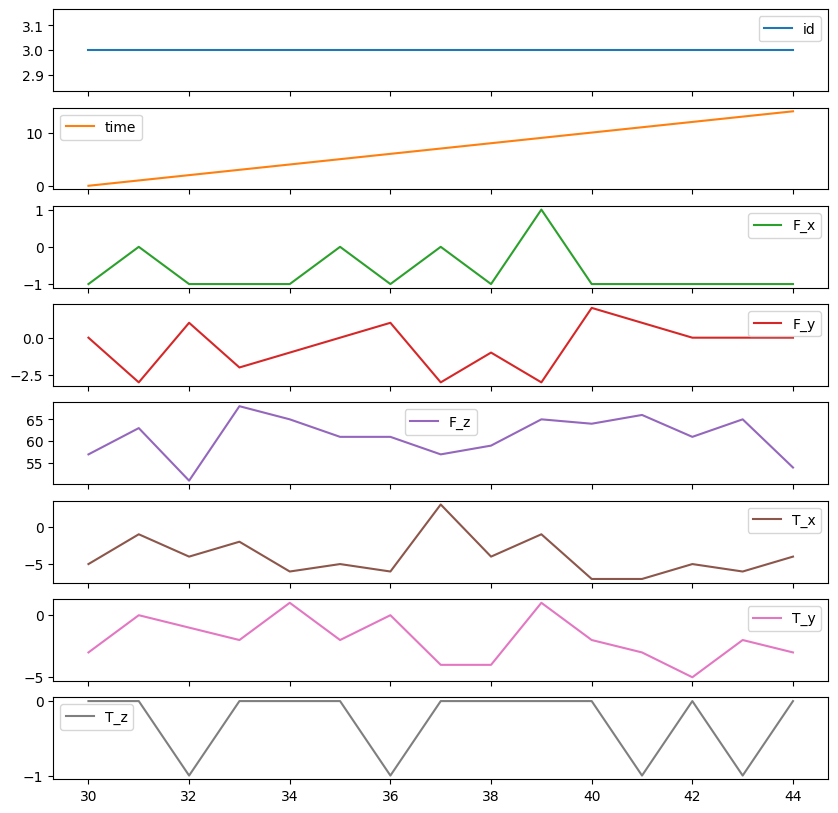

In [5]:
import matplotlib.pyplot as plt
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

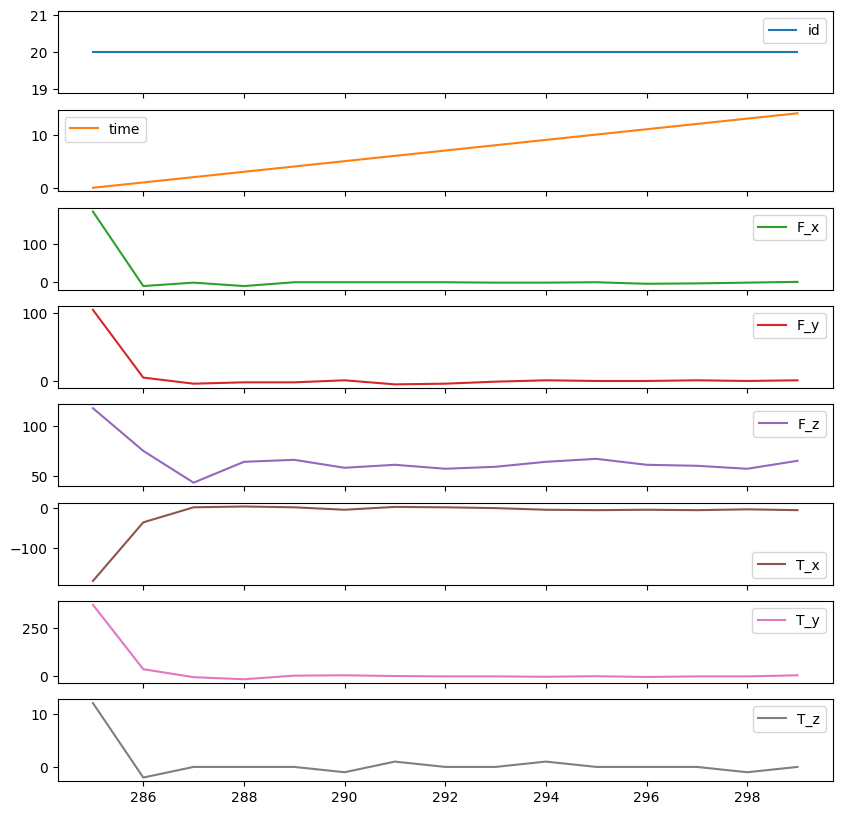

In [8]:
timeseries[timeseries['id'] == 20].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [9]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 88/88 [00:01<00:00, 67.18it/s]


In [12]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)
features_filtered

,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__root_mean_square,F_y__abs_energy,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__variance,...,"F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)",T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,F_z__permutation_entropy__dimension_4__tau_1,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9
1,14.0,14.0,0.966092,1.0,1.000000,15.0,0.930949,13.0,1.000000,0.222222,...,-0.751682,0.400000,-1.0,-5.960000e+02,-1.0,-1.0,1.698783,0.000000,0.0,0.0
2,7.0,25.0,1.290994,5.0,1.571429,13.0,2.250926,76.0,3.000000,4.222222,...,0.057818,0.533333,-3.6,-6.803846e+02,-1.0,-1.0,2.369382,0.000000,1.0,0.0
3,11.0,12.0,0.894427,5.0,1.000000,14.0,1.632993,40.0,2.142857,3.128889,...,0.912474,0.533333,-4.0,-6.170000e+02,-1.0,0.0,2.369382,0.000000,1.0,0.0
4,5.0,16.0,1.032796,6.0,1.285714,10.0,2.000000,60.0,2.428571,7.128889,...,-0.609735,0.533333,-4.6,3.426308e+03,-1.0,1.0,1.979205,0.000000,0.0,0.0
5,9.0,17.0,1.064581,5.0,1.285714,13.0,1.751190,46.0,2.285714,4.160000,...,0.072771,0.466667,-5.0,-2.609000e+03,-1.0,0.8,1.979205,0.000000,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,80.346334,167.0,105.285714,0.0,53.404120,42780.0,71.428571,1563.528889,...,71.641254,0.533333,36.4,-7.700628e+07,-105.0,66.8,1.126929,64.000000,0.0,-1.4
85,0.0,1683.0,10.592450,14.0,13.714286,0.0,10.076375,1523.0,12.142857,14.755556,...,16.349699,0.466667,1.0,-1.050785e+04,5.8,10.6,1.704551,13.555556,0.0,-1.4
86,0.0,83497.0,74.608757,191.0,98.142857,0.0,37.473546,21064.0,47.714286,2788.595556,...,71.095480,0.466667,19.6,-5.544922e+06,30.4,38.4,0.566086,0.250000,0.0,2.8
87,0.0,1405437.0,306.097697,471.0,340.000000,0.0,143.447551,308658.0,157.285714,6415.715556,...,173.699573,0.466667,272.6,-9.881845e+07,246.8,154.8,1.126929,0.000000,0.0,43.2


In [13]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')
features_filtered_direct

Feature Extraction: 100%|██████████| 88/88 [00:01<00:00, 67.43it/s]


,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__root_mean_square,F_y__abs_energy,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__variance,...,"F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)",T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,F_z__permutation_entropy__dimension_4__tau_1,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9
1,14.0,14.0,0.966092,1.0,1.000000,15.0,0.930949,13.0,1.000000,0.222222,...,-0.751682,0.400000,-1.0,-5.960000e+02,-1.0,-1.0,1.698783,0.000000,0.0,0.0
2,7.0,25.0,1.290994,5.0,1.571429,13.0,2.250926,76.0,3.000000,4.222222,...,0.057818,0.533333,-3.6,-6.803846e+02,-1.0,-1.0,2.369382,0.000000,1.0,0.0
3,11.0,12.0,0.894427,5.0,1.000000,14.0,1.632993,40.0,2.142857,3.128889,...,0.912474,0.533333,-4.0,-6.170000e+02,-1.0,0.0,2.369382,0.000000,1.0,0.0
4,5.0,16.0,1.032796,6.0,1.285714,10.0,2.000000,60.0,2.428571,7.128889,...,-0.609735,0.533333,-4.6,3.426308e+03,-1.0,1.0,1.979205,0.000000,0.0,0.0
5,9.0,17.0,1.064581,5.0,1.285714,13.0,1.751190,46.0,2.285714,4.160000,...,0.072771,0.466667,-5.0,-2.609000e+03,-1.0,0.8,1.979205,0.000000,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,80.346334,167.0,105.285714,0.0,53.404120,42780.0,71.428571,1563.528889,...,71.641254,0.533333,36.4,-7.700628e+07,-105.0,66.8,1.126929,64.000000,0.0,-1.4
85,0.0,1683.0,10.592450,14.0,13.714286,0.0,10.076375,1523.0,12.142857,14.755556,...,16.349699,0.466667,1.0,-1.050785e+04,5.8,10.6,1.704551,13.555556,0.0,-1.4
86,0.0,83497.0,74.608757,191.0,98.142857,0.0,37.473546,21064.0,47.714286,2788.595556,...,71.095480,0.466667,19.6,-5.544922e+06,30.4,38.4,0.566086,0.250000,0.0,2.8
87,0.0,1405437.0,306.097697,471.0,340.000000,0.0,143.447551,308658.0,157.285714,6415.715556,...,173.699573,0.466667,272.6,-9.881845e+07,246.8,154.8,1.126929,0.000000,0.0,43.2
